# Dataset avvistamenti UFO

**Attenzione**: Nelle date (campo 'datetime') è presente anche come ora 24:xx che però causa problemi con 
        tutto quello che parsa le date. Ho fatto 'sostituisci tutto' 24 -> 00 ma non è proprio corretto
        perchè bisogna anche aumentare il giorno  
**Attenzione**: Il file 'sample.csv' è il dataset 'scrubbed.csv' ma con solo 1 riga ogni 10, è meglio per testare visto che il dataset originale sono circa 80000 righe e ci mette molto per calcolare alcune cose

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter


OUT_FOLDER = 'grafici'   # il nome della cartella dove verranno salvati i .png dei grafici
FIGURE_SIZE = (20, 8)    # la dimensione dei grafici da generare

%matplotlib inline

In [3]:
DATASET = 'sample_ufos.csv'
data = pd.read_csv(DATASET)

## Avvistamenti per ora del giorno
Qui c'è il codice per generare i grafici del numero di avvistamenti per ora del giorno. Sono più esperimenti, ci sono con tutte le ore specificate oppure con intervalli di 3 ore (leggermente shiftati per avere le 12:00 al centro).
Per modificare i colori cambiate la variabile 'gradients'

In [5]:
# Questo è leeeento
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
counts = data['datetime'].dt.hour.value_counts()

In [7]:
hour_groups = [[23, 0, 1]] + [[h, h+1, h+2] for h in range(2, 23, 3)]
def find_group(hour):
    for i, g in enumerate(hour_groups):
        if hour in g: return i
    return -1
dt = data['datetime']
grouped_hours = dt.groupby(lambda i: find_group(dt.iloc[i].hour))

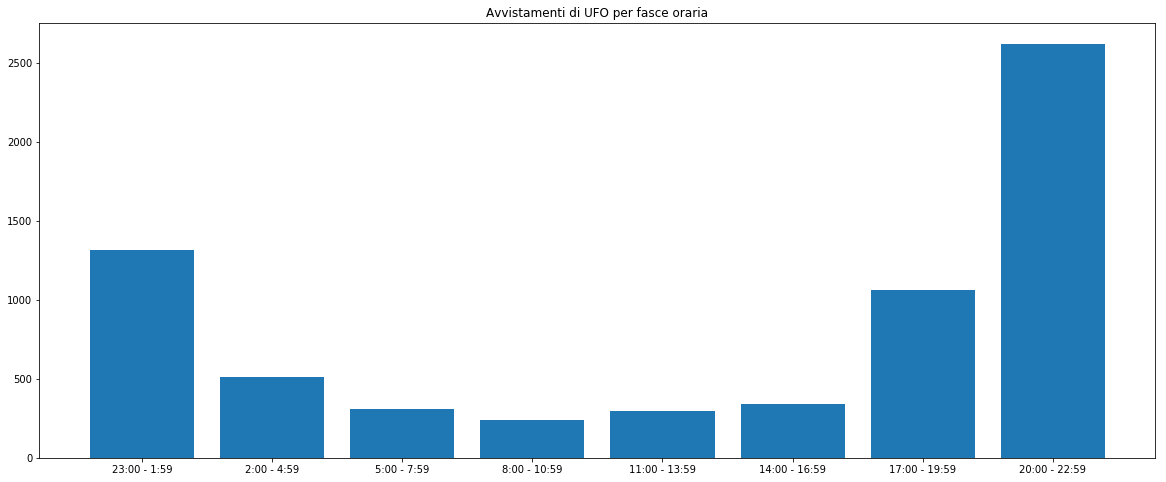

In [8]:
# Grafico degli avvistamenti per ora del giorno (a colori)
grouped_hours_counts = grouped_hours.size()

plt.figure(figsize=FIGURE_SIZE)
plt.title('Avvistamenti di UFO per fasce oraria')
bars = plt.bar(grouped_hours_counts.index, grouped_hours_counts.get_values())
labels = [f'{starth}:00 - {endh}:59' for (starth, _, endh) in hour_groups]
plt.xticks(range(len(labels)), labels)

plt.savefig(f'{OUT_FOLDER}/AvvistamentiOraDelGiorno/SenzaColori.png')
plt.show()

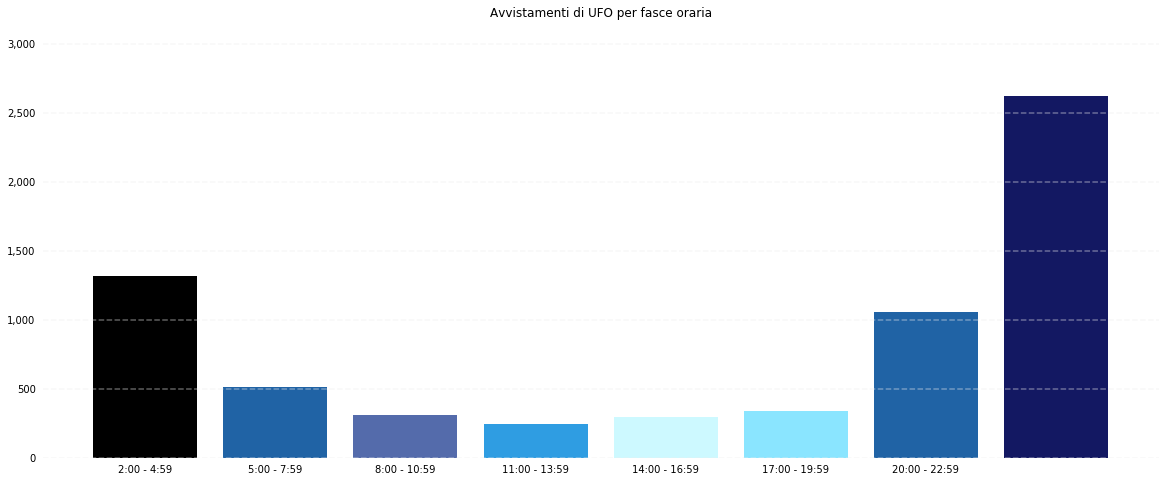

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [10]:
'''
ATTENTO: Non so perchè ma manca la label all'"ultimo". Però le barre dovrebbero iniziare 
da quella che adesso è ultima (quella che contiene mezzanotte). Prova a fixare, altrimenti 
aggiungi un elemento extra alle label alla fine
'''

fig, ax = plt.subplots(figsize=FIGURE_SIZE)
# Da [23:00, 1:59] a gruppi di 3 ore fino a [20:00, 22:59]
gradients = [
    (0, 0, 0), (32,99,165), (84, 107, 171), (47,157,226), 
    (205,249,255), (138,229,255), (32,99,165), (19, 24, 98)
]
gradients = [(r/255, g/255, b/255, 1.0) for (r, g, b) in gradients]

bars = plt.bar(grouped_hours_counts.index, grouped_hours_counts.get_values(), color=gradients)

for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.set_title('Avvistamenti di UFO per fasce oraria')
labels = [f'{starth}:00 - {endh}:59' for (starth, _, endh) in hour_groups]
print(labels)
ax.set_xticklabels(labels)

# Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)
    
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig(f'{OUT_FOLDER}/AvvistamentiOraDelGiorno/ConColoriV2.png')
plt.show()


# Avvistamenti UFO per nazione (in tutti gli anni)

In [88]:
countries_to_consider = {
    "us": 318,
    "ca": 35,
    "gb": 64,
    "au": 23,
    "in": 255,
    "mx": 120,
    "nz": 4.5,
    "nl": 16.8,
    "br": 202.8
}
# I nomi estesi dei paesi, per creare una legenda nel grafico
countries_names = {
    "us": "Stati Uniti",
    "ca": "Canada",
    "gb": "Regno Unito",
    "au": "Australia", 
    "na": "Nuova Zelanda"
}

country_counts = data['country'].value_counts()[countries_to_consider.keys()]
for country, population in countries_to_consider.items():
    country_counts[country] /= population
country_counts = country_counts[country_counts > 6]  # Filtro i paesi che hanno praticamente 0 avvistamenti

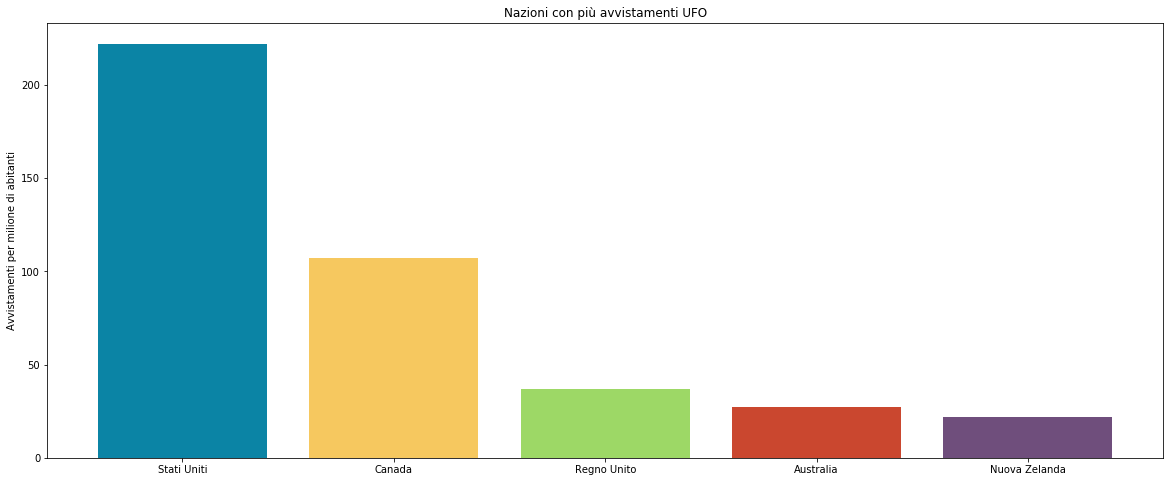

(None, us    222
 ca    107
 gb     37
 au     27
 nz     22
 Name: country, dtype: int64)

In [89]:
plt.figure(figsize=FIGURE_SIZE)

colors = [
    (11, 132, 165), (246, 200, 95), (157, 216, 102), (202, 71, 47), (111, 78, 124)
]
colors = [(r/255, g/255, b/255, 1.0) for (r, g, b) in colors]

bars = plt.bar(country_counts.index, country_counts.get_values(), color=colors)

labels = [label for _, label in countries_names.items()]
plt.xticks(range(len(labels)), labels)
plt.ylabel('Avvistamenti per milione di abitanti')
plt.title('Nazioni con più avvistamenti UFO')

plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazione/BarChart_Verticale.png')
plt.show(), country_counts

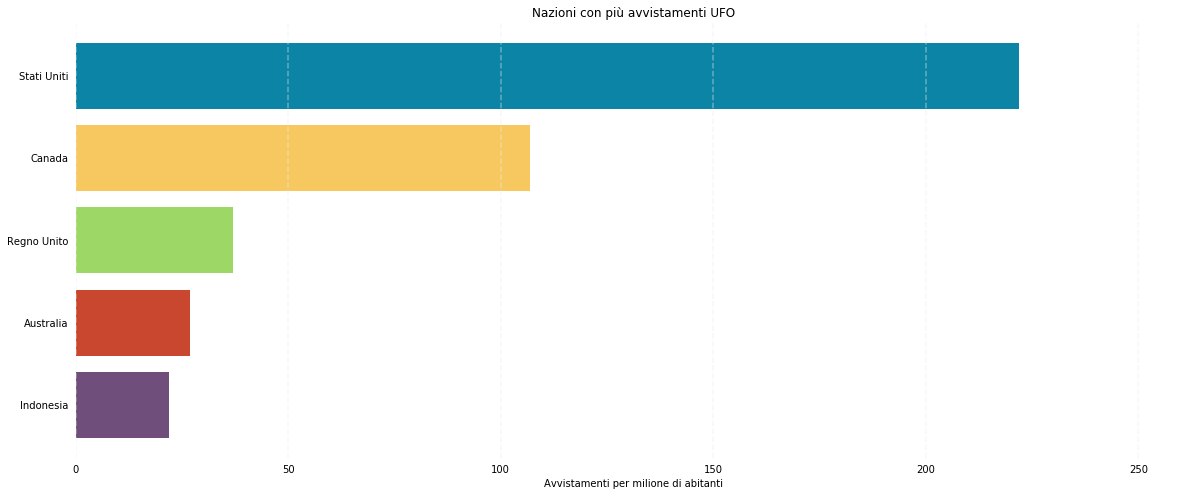

In [126]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
#plt.figure(figsize=FIGURE_SIZE)

colors = [
    (11, 132, 165), (246, 200, 95), (157, 216, 102), (202, 71, 47), (111, 78, 124)
]
colors = [(r/255, g/255, b/255, 1.0) for (r, g, b) in colors]

bars = ax.barh(country_counts.index, country_counts.get_values(), color=colors)

labels = [label for _, label in countries_names.items()]
# Con i subplot per qualche motivo non funzionano xticks, xlabel, title
# Bisogna usare le versioni set_*
ax.set_yticklabels(labels)
ax.set_xlabel('Avvistamenti per milione di abitanti')
ax.set_title('Nazioni con più avvistamenti UFO')

# Per fare che la barra più grande è in alto
plt.gca().invert_yaxis()

# Rimuovo i bordi del grafico
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazione/BarChart_Orizzontale.png')
plt.show()

# Avvistamenti UFO negli anni per paese
Questi che seguono rappresentano la stessa cosa, il numero di avvistamenti negli anni per paese. I dati sono stati normalizzati per milioni di abitanti per paese. I paesi scelti sono quelli che hanno un po' di avvistamenti (almeno 10, circa). 
I grafici qui sono (in ordine):
- A linee
- A linee in small multiple
- Barchart verticale
- Barchart orizzontale

In [107]:
# Questi dati servono per creare i grafici che seguono sugli avvistamenti negli anni per paesi diversi
# popolazione e milioni di abitanti (nel 2014)
countries_to_consider = {
    "us": 318,
    "ca": 35,
    "gb": 64,
    "au": 23,
    #"in": 255,
    #"mx": 120,
    #"nz": 4.5,
    #"nl": 16.8,
    #"br": 202.8
}
# I nomi estesi dei paesi, per creare una legenda nel grafico
countries_names = {
    "us": "Stati Uniti",
    "ca": "Canada",
    "gb": "Regno Unito",
    "au": "Australia",
    "in": "Indonesia",
    "mx": "Mexico",
    "nz": "Nuova Zelanda",
    "nl": "Paesi Bassi",
    "br": "Brasile",
}

countries_data = pd.crosstab(
    data['datetime'].dt.year, 
    data['country']
).loc[:, countries_to_consider.keys()]

# Normalizza per popolazione
for country, population in countries_to_consider.items():
    countries_data[country] /= population

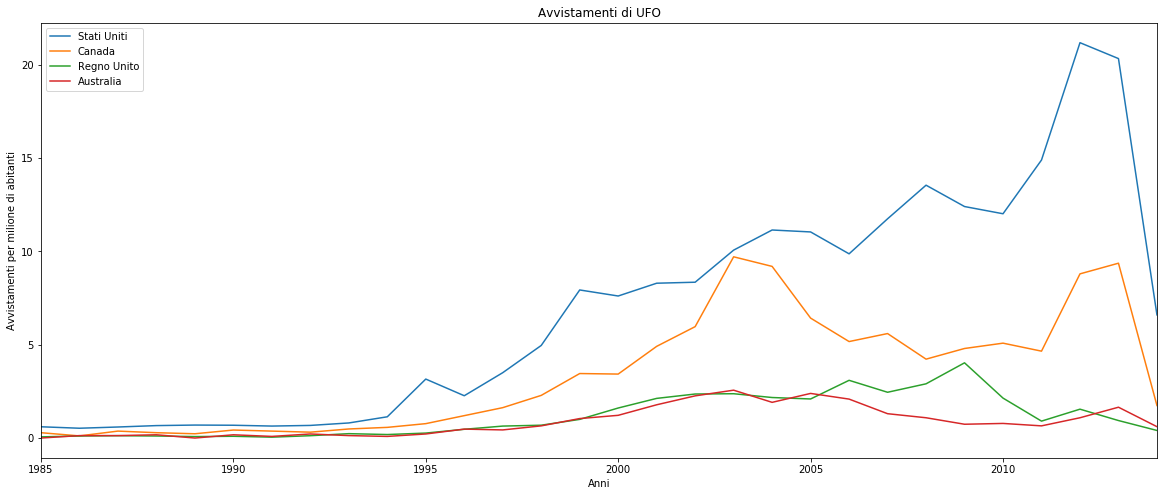

In [108]:
countries_data.plot(figsize=FIGURE_SIZE, xlim=(1985, 2014))
plt.title('Avvistamenti di UFO')
plt.xlabel('Anni')
plt.ylabel('Avvistamenti per milione di abitanti')

for label in plt.legend().get_texts():
    label.set_text(countries_names[label.get_text()])

plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazioneNegliAnni/Lines.png')
plt.show()

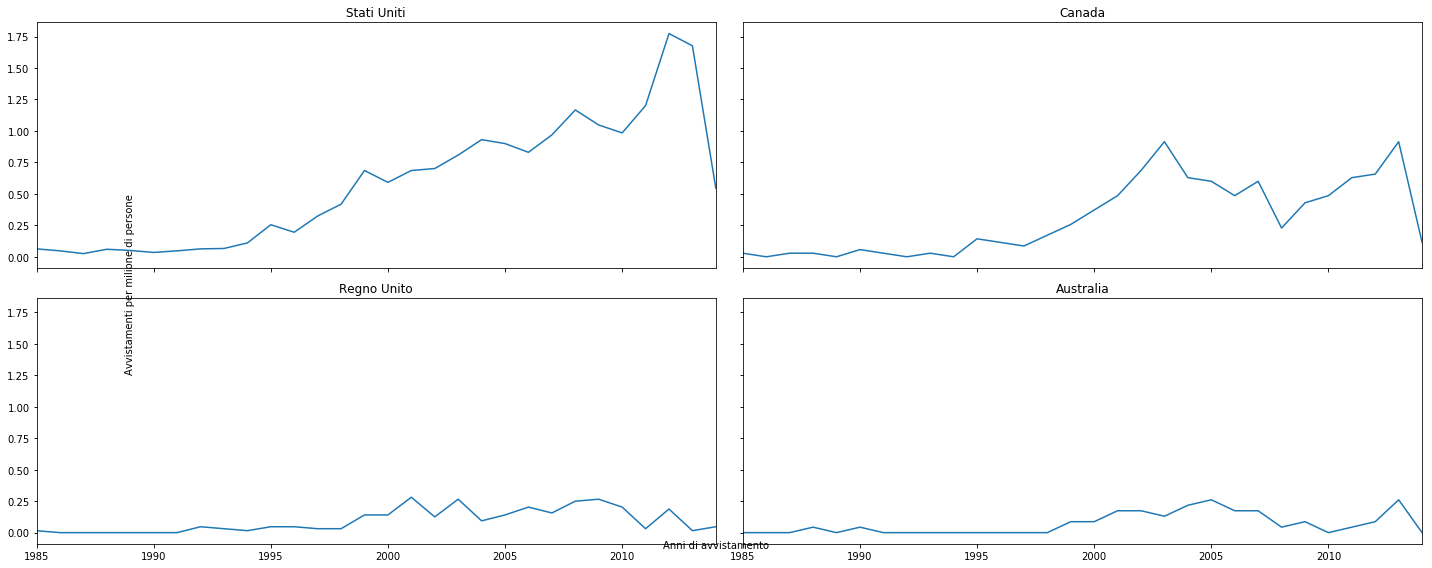

In [120]:
# Versione con small multiples
# ATTENTO: Sul notebook le scritte degli assi sembrano sbagliate, ma se guardi l'immagine generatasono giuste!

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    sharex=True, 
    sharey=True, 
    figsize=FIGURE_SIZE
)

# 'ax' normalmente è una lista di liste. così lo converto in una lista normale
ax = [item for sublist in axes for item in sublist] 

for country, ax in zip(countries_to_consider.keys(), ax):
    countries_data[country].plot(ax=ax)
    ax.set_title(countries_names[country])
    ax.set_xlim((1985, 2014))
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Anni di avvistamento', ha='center')
fig.text(0.089, 0.5, 'Avvistamenti per milione di persone', va='center', rotation='vertical')
    
plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazioneNegliAnni/Lines_SmallMultiple.png')
plt.tight_layout()
plt.show()

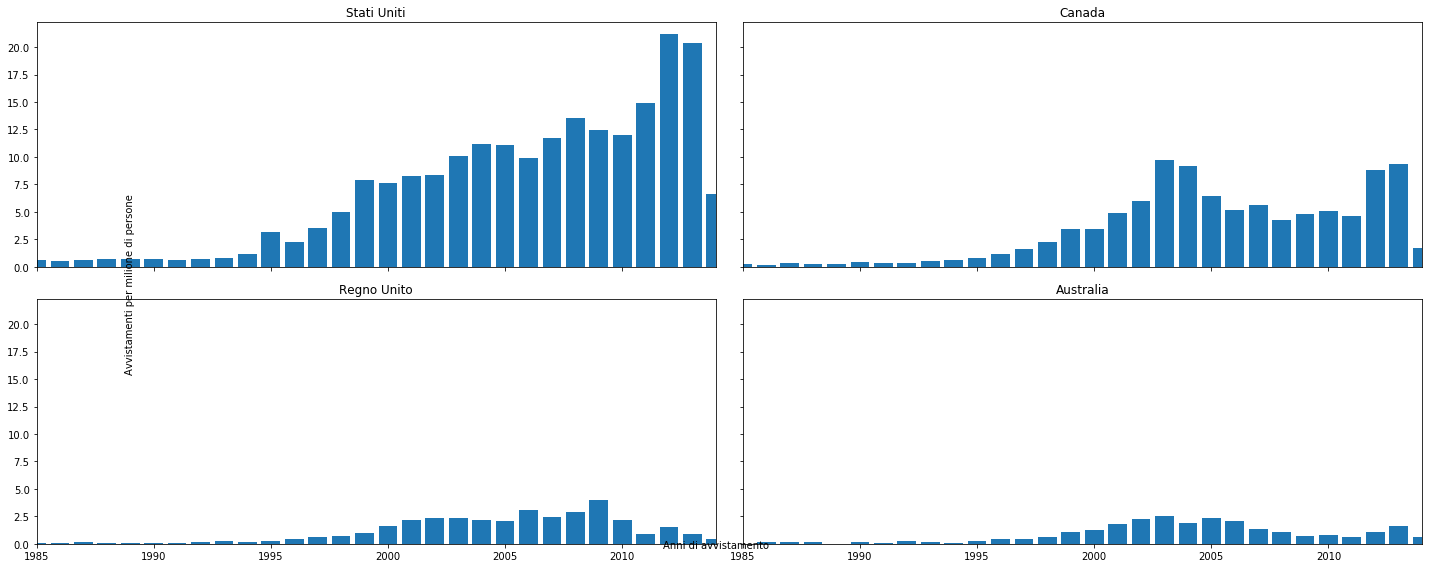

In [132]:
# Versione bar chart
# ATTENTO: Sul notebook le scritte degli assi sembrano sbagliate, ma se guardi l'immagine generata sono giuste!

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    sharex=True, 
    sharey=True, 
    figsize=FIGURE_SIZE
)

# 'ax' normalmente è una lista di liste. così lo converto in una lista normale
axes = [item for sublist in axes for item in sublist] 

for country, ax in zip(countries_to_consider.keys(), axes):
    ax.bar(countries_data[country].index, countries_data[country].get_values())
    ax.set_title(countries_names[country])
    ax.set_xlim((1985, 2014))
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Anni di avvistamento', ha='center')
fig.text(0.089, 0.5, 'Avvistamenti per milione di persone', va='center', rotation='vertical')

plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazioneNegliAnni/BarChart_Verticale.png')
plt.tight_layout()
plt.show()

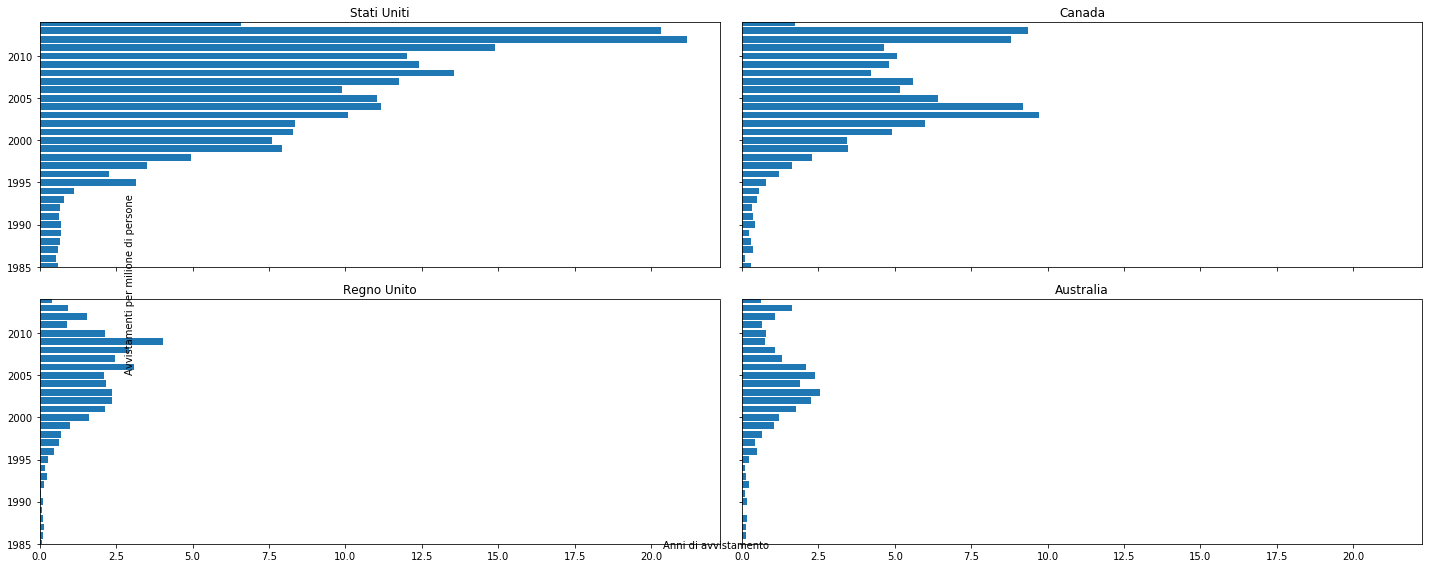

In [125]:
# Versione bar chart in orizzontale
# ATTENTO: Sul notebook le scritte degli assi sembrano sbagliate, ma se guardi l'immagine generata sono giuste!

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    sharex=True, 
    sharey=True, 
    figsize=FIGURE_SIZE
)

# 'axes' normalmente è una lista di liste. così lo converto in una lista normale
axes = [item for sublist in axes for item in sublist] 

for country, ax in zip(countries_to_consider.keys(), axes):
    ax.barh(countries_data[country].index, countries_data[country].get_values())
    ax.set_title(countries_names[country])
    ax.set_ylim((1985, 2014))
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Anni di avvistamento', ha='center')
fig.text(0.089, 0.5, 'Avvistamenti per milione di persone', va='center', rotation='vertical')
    
plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazioneNegliAnni/BarChart_Orizzontale.png')
plt.tight_layout()
plt.show()

# Quanto dura un'avvistamento?
Alcuni grafici che mostrano quanto durano gli avvistamenti e se è cambiata la durata nel tempo

In [140]:
bins = [10, 30, 60 * 1, 60 * 2, 60 * 5, 60 * 15, 60 * 60, 60 * 60 * 4, 60*60*24, 10000000000]
def find_bin(x):
    return next((i for i, current_bin in enumerate(bins) if x <= current_bin))
counts = data['duration (seconds)'].groupby(find_bin).size()

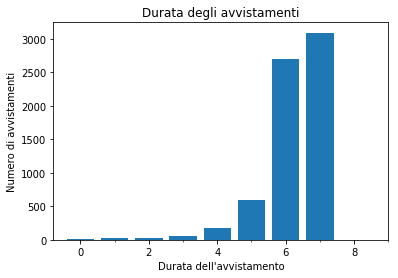

In [142]:
fig, ax = plt.subplots()

ax.bar(counts.index, counts.get_values())

labels = ['10 secondi', '30 secondi', '1 minuto', '2 minuti', '5 minuti', '15 minuti', '1 ora', '4 ore', '1 giorno', 'di più']
ax.set_xticks(range(len(labels)), labels)
ax.set_title('Durata degli avvistamenti')
ax.set_ylabel('Numero di avvistamenti')
ax.set_xlabel("Durata dell'avvistamento")

plt.show()